In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [91]:
filename = 'Perumahan.csv'
data = pd.read_csv(filename)
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


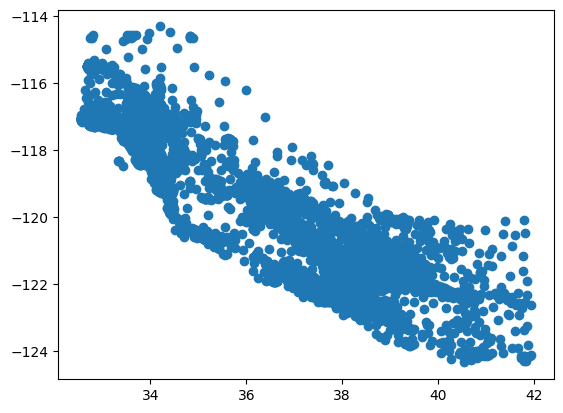

In [92]:
filename = 'Perumahan.csv'
data = pd.read_csv(filename)

# Assuming latitude and longitude are columns in your CSV file
data = data.loc[:, ['latitude', 'longitude']]

plt.scatter(data.latitude, data.longitude)
plt.show()


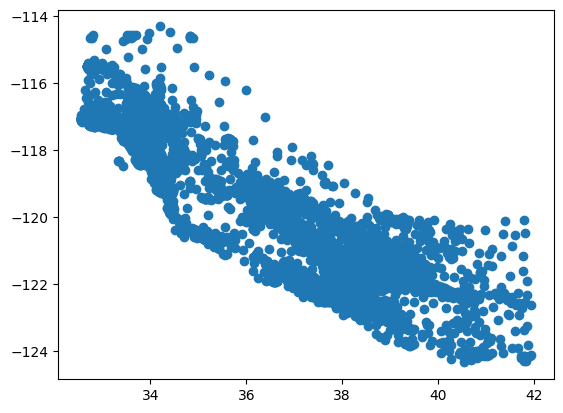

In [93]:
data=data.loc[:,['latitude','longitude']]
plt.scatter(data.latitude, data.longitude)

In [94]:
data=np.array(data)

In [95]:
K=5
m=3

U=np.random.rand(data.shape[0],K)
U/=np.sum(U, axis=1)[:,np.newaxis]
U

array([[0.21681844, 0.21656137, 0.11211163, 0.36355377, 0.09095479],
       [0.35084611, 0.04373555, 0.16306311, 0.1441173 , 0.29823793],
       [0.13593948, 0.23376064, 0.14226835, 0.22869175, 0.25933978],
       ...,
       [0.06982936, 0.23430172, 0.09389114, 0.34022513, 0.26175265],
       [0.00718855, 0.3735884 , 0.18243558, 0.04879991, 0.38798756],
       [0.17839001, 0.15117439, 0.27029603, 0.22157327, 0.17856629]])

In [96]:
def calculate_centroid (data, K, U, m):
    Centroids=np.zeros((K,data.shape[1]))
    for i in range (K):
        Centroids[i,:]=np.sum((U[:,i]**m)[:,np.newaxis]*data, axis=0)/np.sum(U[:,i]**m)
    return Centroids

In [97]:
def calculate_membership (data, Centroids, K , m):
    U_new=np.zeros((data.shape[0],K))
    for i in range (K):
        U_new[:,i]=np.linalg.norm(data-Centroids[i,:],axis=1)

    U_new=1/ (U_new ** (2/(m-1)) * np.sum((1/U_new) ** (2/(m-1)) , axis=1 )[:,np.newaxis] )
    return U_new

In [98]:
labels=np.argmax(U_new, axis=1)
labels

array([2, 2, 2, ..., 1, 1, 1])

<Axes: >

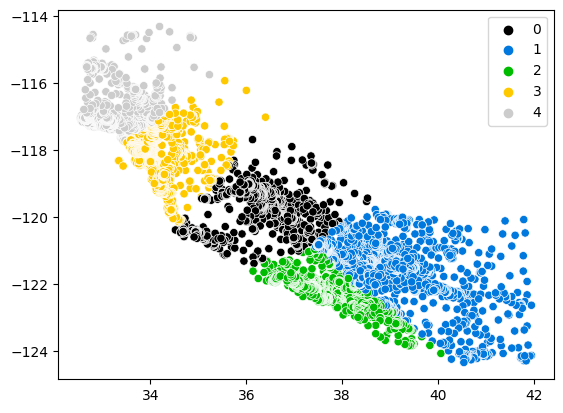

In [99]:
sns.scatterplot(data=data, x=data[:,0],y=data[:,1], hue=labels, palette='nipy_spectral')

In [100]:
max_iteration=100
for iteration in range (max_iteration):
    Centroids=calculate_centroid(data, 5, U , 3)
    U_new= calculate_membership (data,Centroids, 5 , 3 )



    if np.linalg.norm (U_new- U)<=0.00001:
        break
    U=U_new

    labels=np.argmax(U_new, axis=1)

<Axes: >

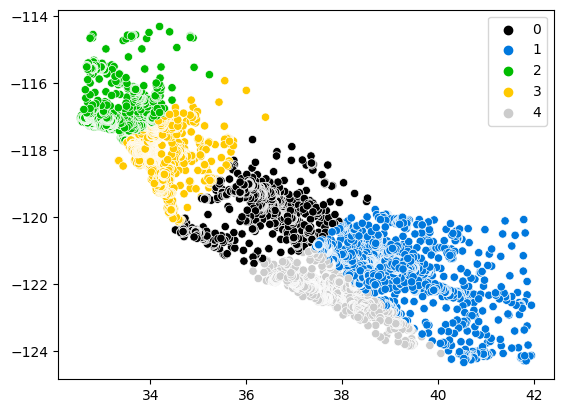

In [101]:
sns.scatterplot(data=data, x=data[:,0],y=data[:,1], hue=labels, palette='nipy_spectral')